<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Calderón Velasco Andrés Sebastian** 

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [18]:
# Se revisa el archivo miningscience.py
import miningscience as msc
help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    Función que extrae listado de artículos desde pubmed a traves de un keyword que ingresa el usuario entre comillas

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)
    Función que pide como primera entrada tres tipos de opciones "DP", "AU" y "AD". Si coloca "DP" el resultado es un data con el PMID y el DP_year, si es "AU" recupera el número de autores (num_auth) por PMID, y si el tipo es "AD" el retorno es un dataframe con el country y el num_auth. Se pide un segundo argumento que corresponde al keyword usado para la descarga de archivos con la funcion download pubmed




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [19]:
a = msc.download_pubmed("Ecuador genomics")
import re
b = re.findall(r"PMID- ", a)
print("El número de articulos es: ", len(b))
c = re.findall(r"\d{8}", a)
print("El PMID del primer articulo es: ", c[0])

El número de articulos es:  193
El PMID del primer articulo es:  35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [20]:
# Se llama el módulo realizado en el archivo .py para encontrar años, autores y paises

pub_year = msc.mining_pubs("DP","Ecuador_genomics")
pub_authors = msc.mining_pubs("AU","Ecuador_genomics")
countries = msc.mining_pubs("AD","Ecuador_genomics")

# Se imprimen los dos primeros y los dos últimos registros de cada dataframe
print()
print("Primeros dos y ultimos dos registros")
print()
# paises (countries)
print(countries[0:2])
print()
print(countries[67:69])
print()

# autores (pub_authors)
print(pub_authors[0:2])
print()
print(pub_authors[191:193])
print()

# año (pub_year)
print(pub_year[0:2])
print()
print(pub_year[67:69]) 


Primeros dos y ultimos dos registros

        pais  numero de autores
0  Argentina                 44
1     Canada                 83

           pais  numero de autores
67  Netherlands                  3
68      MexicoF                  4

       PMID  Numero de autores
0  35121084                 12
1  35120121                 14

         PMID  Numero de autores
191  17187350                  1
192   8661097                  9

       PMID Año de publicación
0                         2022
1  35121084               2022

        PMID Año de publicación
67  32447234               2020
68  32419208               2020


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Media:  2018.1813471502592
Desviación estandar:  3.1677516094333185


Text(0, 0.5, 'Repeticiones')

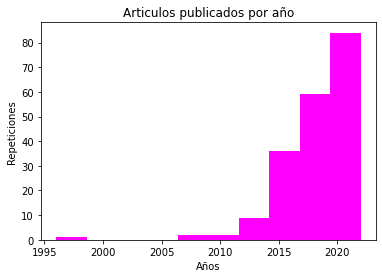

In [21]:
# Gráfico de años (pubyear):

import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_year["Año de publicación"] = pub_year["Año de publicación"].astype("int")
media_py = pub_year["Año de publicación"].mean()
des_py = pub_year["Año de publicación"].std()
print ("Media: ", media_py)
print ("Desviación estandar: ", des_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_year["Año de publicación"]), max(pub_year["Año de publicación"]))
plot.hist(x=pub_year["Año de publicación"], color = "magenta")
plot.title("Articulos publicados por año")
plot.xlabel("Años")
plot.ylabel("Repeticiones")

KeyError: "None of [Index(['Autores'], dtype='object')] are in the [columns]"

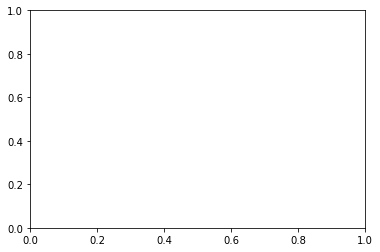

In [38]:
# Gráfico de autores (pub_authors)
boxplot = pub_authors[0:827].boxplot(column=["Autores"])
plot.title("Numero de autores por articulos")
plot.ylabel("Frecuencia")

Text(0, 0.5, 'Latitud')

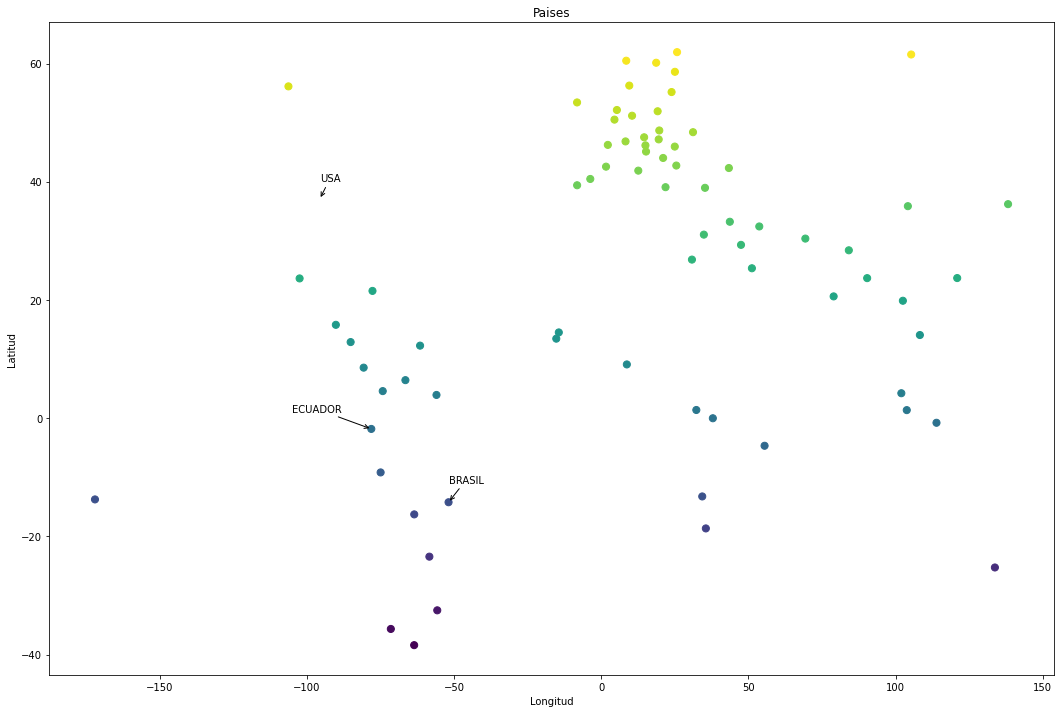

In [36]:

import re
import itertools
import csv
with open('Ecuador_genomics.txt', errors = 'ignore') as f:
    mi_pubmed = f.read()
    # Minado paises
mi_pubmed = re.sub(r'\n\s{6}', ' ', mi_pubmed)

# Se extraen los países
pub1 = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", mi_pubmed)
textounico = list(set(pub1))
textounico.sort()
a = textounico
# Se observan los países que se repiten y si hay elementos intrusos que no son países 
b = textounico
b.remove(', Acad.')
b.remove(', Apdo.')
b.remove(', Aptdo.')
b.remove(', Bldg.')
b.remove(', Calif.')
b.remove(', Colo.')
b.remove(', Connecticut.')
b.remove(', Ctra.')
b.remove(', Edif.')
b.remove(', Fac.')
b.remove(', Prof.')
print()     
c = "".join(b)
d = c.split(", ")
e = "".join(d)
f = e.split(".")
f.pop(8)
unique_zipcodes = f
import pandas as pd
data = pd.read_csv('./Paises_ubicacion.csv', engine='python', skipfooter=3)
data.head(15)
datos_nombre = data[data.name.isin(unique_zipcodes)]
datos_paises = data[data.country.isin(unique_zipcodes)]
all_data =pd.concat([datos_nombre,datos_paises]).drop_duplicates().sort_values('name')
all_data.head(15)
#Gráfica
import matplotlib.pyplot as plt
plt.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)

ard = dict(arrowstyle="->")
plt.annotate('BRASIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('ECUADOR', xy = (-78.1834066, -1.831239), 
               xytext = (-105, 1), arrowprops= ard)
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.title("Paises")
plot.xlabel("Longitud")
plot.ylabel("Latitud")

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [ ]:
# Escriba aquí su código para el ejercicio 6



**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```